In this notebook,I have done some Exploratory Data Analysis(EDA) on the data and also, I used different classifier models to predict the quality of the wine.
1.	Logistic Regression
2.	KNeighborsClassifier
3.	SVC
4.	DecisionTree Classifier
5.	RandomForest Classifier
And also, I used cross validation evaluation technique to optimize the model performance.



In [120]:
!pip install graphviz

In [121]:
!pip install six

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import FormatStrFormatter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier ,export_graphviz 
import graphviz
from IPython.display import Image  # To plot decision tree.

import six 
from six import StringIO

In [3]:
df= pd.read_csv("C:/Users/coelh/Downloads/archive (2)/wineQualityReds.csv")
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [5]:
display(np.round(df.describe()))

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,800.0,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,462.0,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,1.0,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,400.0,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,800.0,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,1200.0,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,1599.0,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


In [6]:
df.groupby('quality').count()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18,18


In [7]:
null_columns=df.columns[df.isnull().any()]
print(null_columns)

Index([], dtype='object')


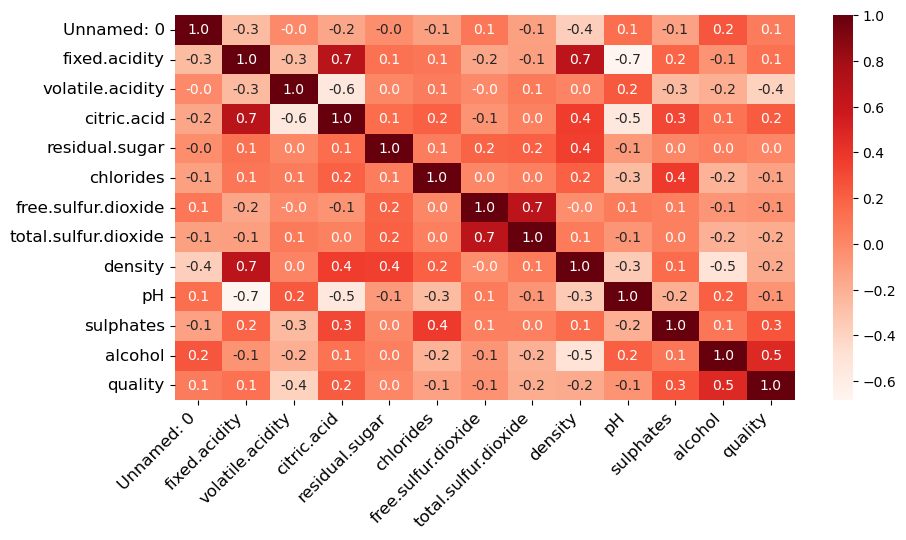

In [8]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="Reds")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)0+--
plt.show()

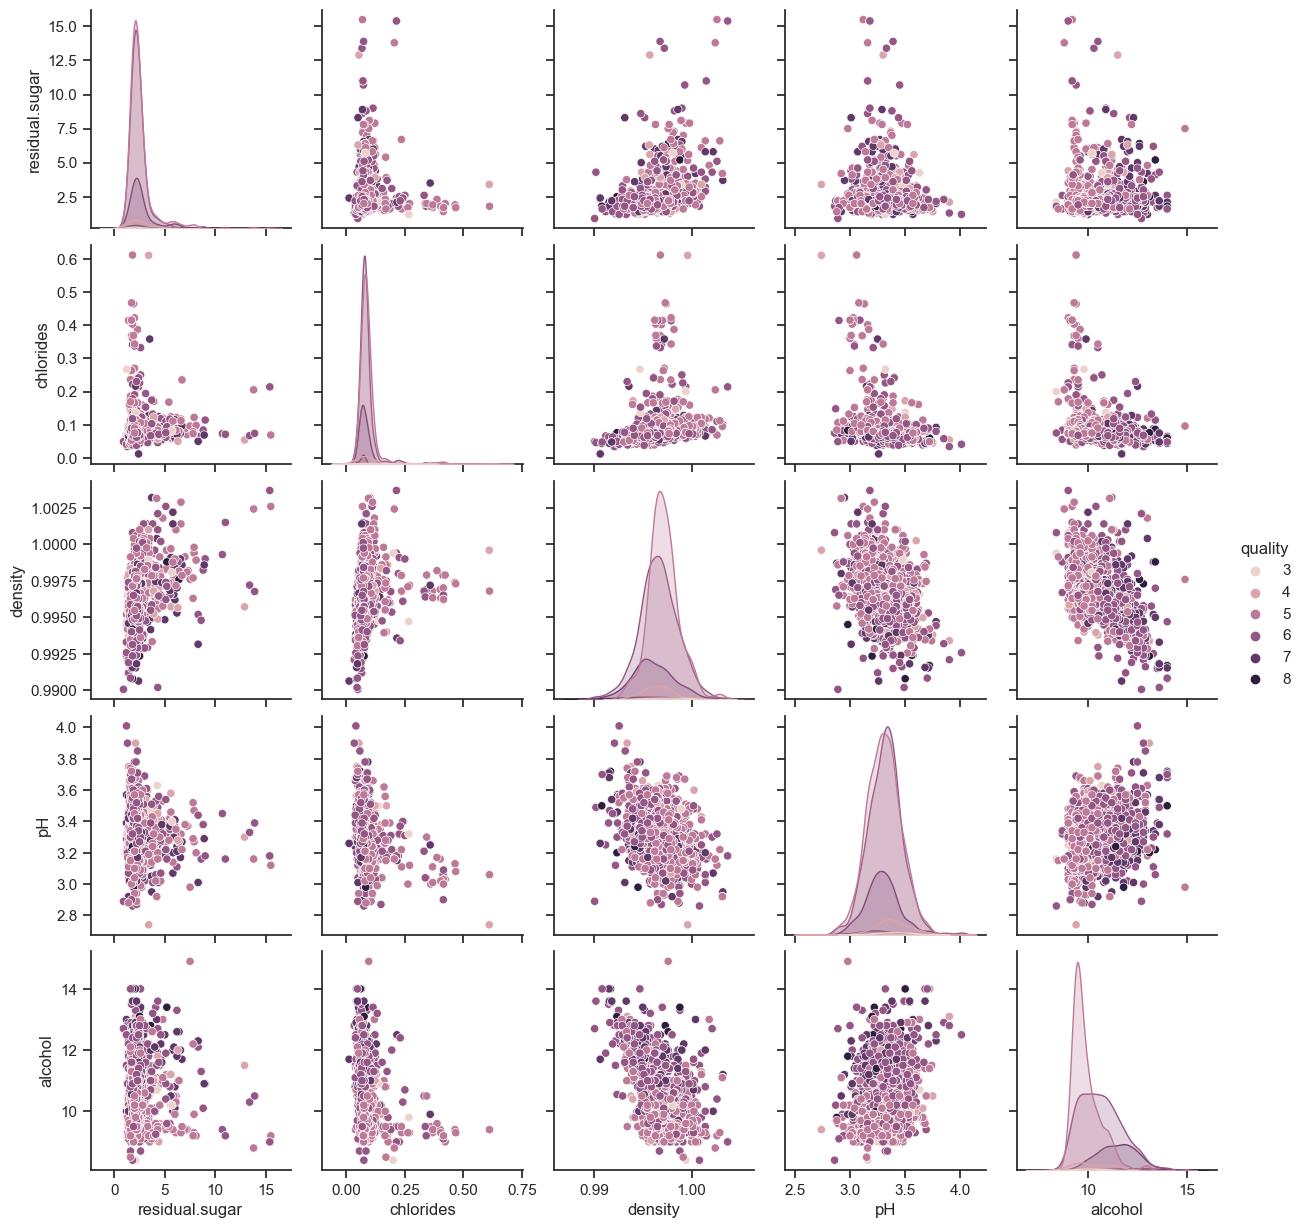

In [68]:
#relationship between the some of features
cols_sns = ['residual.sugar', 'chlorides', 'density', 'pH', 'alcohol', 'quality']
sns.set(style="ticks")
sns.pairplot(df[cols_sns],hue="quality")

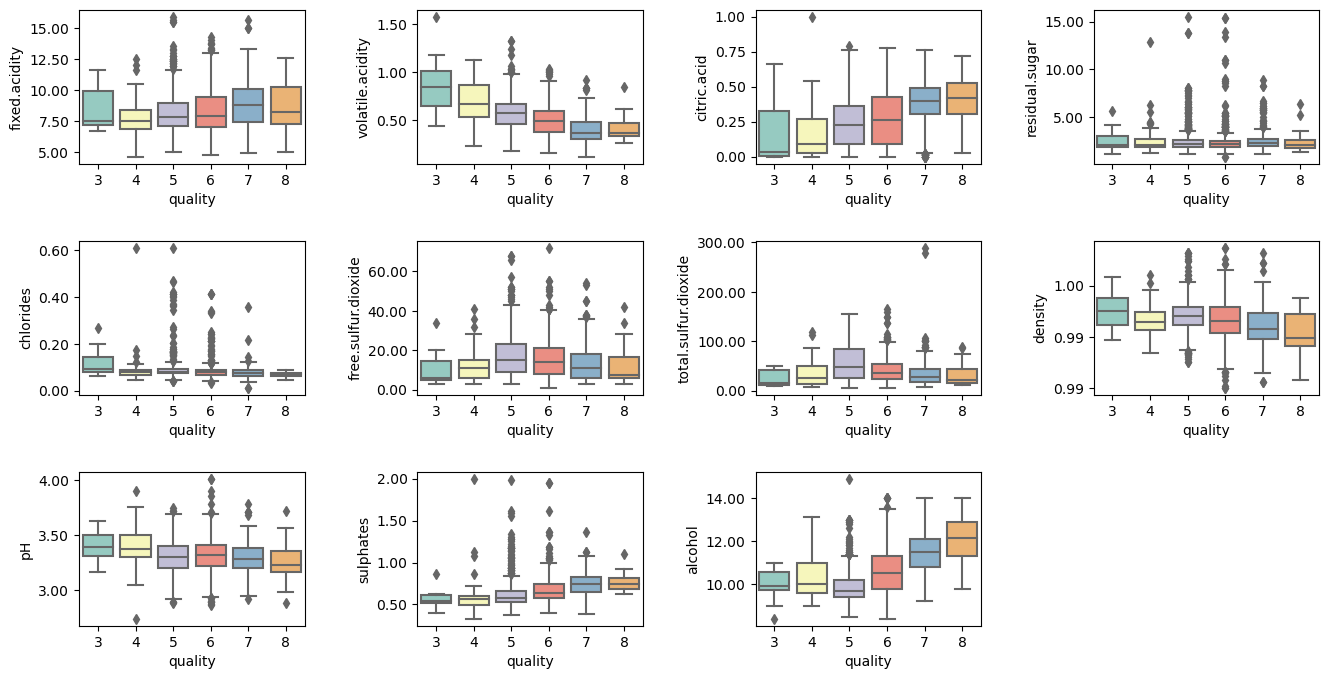

In [10]:
#BoxPlot for different features.
features = ["fixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar", "chlorides",
            "free.sulfur.dioxide", "total.sulfur.dioxide", "density", "pH", "sulphates", "alcohol"]

fig = plt.figure(figsize=(16,8))
for i in range(len(features)):
    ax1 = fig.add_subplot(3, 4, i+1)
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    sns.boxplot(x="quality", y=features[i], data=df,palette="Set3")
    i = i + 1
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)
plt.show()

<Axes: xlabel='quality', ylabel='sulphates'>

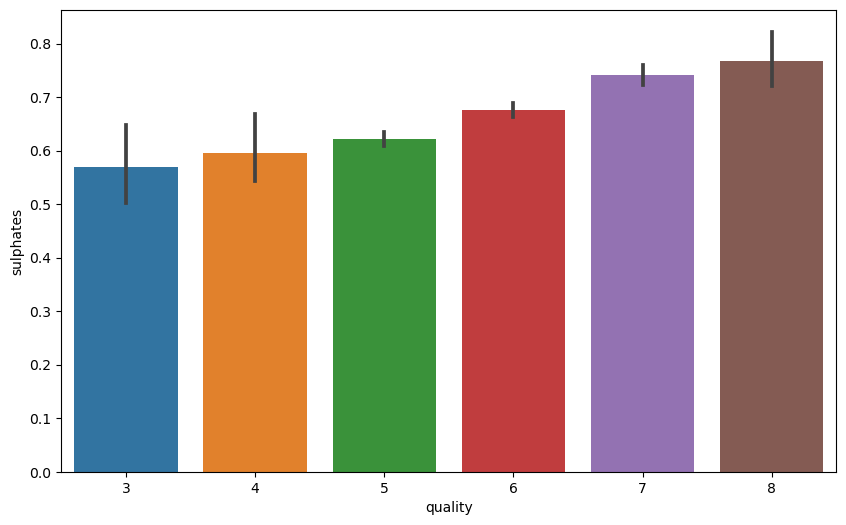

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='sulphates',data=df)

In [12]:
from sklearn.preprocessing import LabelEncoder
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder()-*
df['quality'] = label_quality.fit_transform(df['quality'])*
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [13]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_siz*3*e = 0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
print("X_train {0} , X_test {1} " .format(X_train.shape , X_test.shape))

X_train (1279, 12) , X_test (320, 12) 


In [15]:
#------------------------######### LogisticRegression #######-----------------
lrg_classifier = LogisticRegression(solver='newton-cg',tol= 0.0001,C= 0.5,)
lrg_classifier.fit(X_train, y_train.ravel())

cv_lr = cross_val_score(estimator = lrg_classifier, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

lt_y_pred_train = lrg_classifier.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, lt_y_pred_train)
print("Training set accuracy for Logistic Regression: ", accuracy_lr_train)

y_pred_lr_test = lrg_classifier.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set accuracy for Logistic Regression: ", accuracy_lr_test)

CV:  0.7396407480314962
Training set accuracy for Logistic Regression:  0.745113369820172
Test set accuracy for Logistic Regression:  0.74375


In [16]:
lrg_classifier.fit(X_train, y_train)
lr_y_pred_test = lrg_classifier.predict(X_test)

print(classification_report(y_test, lr_y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       144
           1       0.79      0.73      0.76       176

    accuracy                           0.74       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.74      0.74       320



In [17]:
confusion_matrix(y_test, lr_y_pred_test)

tp_lr = confusion_matrix(y_test, lr_y_pred_test)[0,0]
fp_lr = confusion_matrix(y_test, lr_y_pred_test)[0,1]
tn_lr = confusion_matrix(y_test, lr_y_pred_test)[1,1]
fn_lr = confusion_matrix(y_test, lr_y_pred_test)[1,0]

In [18]:
#------------------------#########  KNeighbors #######-----------------
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 28, weights = 'distance')
knn_classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=28, weights='distance')

In [19]:
# Predicting Cross Validation Score
knn_cv = cross_val_score(estimator = knn_classifier, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", knn_cv.mean())

knn_y_pred_train = knn_classifier.predict(X_train)
knn_accuracy_train = accuracy_score(y_train, knn_y_pred_train)
print("Training set accuracy for KNN: ", knn_accuracy_train)
+---
knn_y_pred_test = knn_classifier.predict(X_test)
knn_accuracy_test = accuracy_score(y_test, knn_y_pred_test)
print("Test set accuracy for KNN: ", knn_accuracy_test)

CV:  0.7904343011811024
Training set accuracy for KNN:  1.0
Test set accuracy for KNN:  0.790625


In [20]:
confusion_matrix(y_test, knn_y_pred_test)

tp_knn = confusion_matrix(y_test, knn_y_pred_test)[0,0]
fp_knn = confusion_matrix(y_test, knn_y_pred_test)[0,1]
tn_knn = confusion_matrix(y_test, knn_y_pred_test)[1,1]
fn_knn = confusion_matrix(y_test, knn_y_pred_test)[1,0]

In [21]:
#########  SVC #######
from sklearn.svm import SVC
svm_linear_classifier = SVC(kernel = 'linear')
svm_linear_classifier.fit(X_train, y_train.ravel())

SVC(kernel='linear')

In [22]:
svm_linear_cv = cross_val_score(estimator = svm_linear_classifier, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", svm_linear_cv.mean())

svm_linear_train_y_pred = svm_linear_classifier.predict(X_train)

svm_linear_accuracy_train = accuracy_score(y_train, svm_linear_train_y_pred)
print("Training set accuracy for SVC: ", svm_linear_accuracy_train)

svm_linear_y_pred_test = svm_linear_classifier.predict(X_test)
svm_linear_accuracy_test = accuracy_score(y_test, svm_linear_y_pred_test)
print("Test set accuracy for SVC: ", svm_linear_accuracy_test)

CV:  0.7380659448818898
Training set accuracy for SVC:  0.7474589523064894
Test set accuracy for SVC:  0.74375


In [23]:
confusion_matrix(y_test, svm_linear_y_pred_test)

tp_svm_linear = confusion_matrix(y_test, svm_linear_y_pred_test)[0,0]
fp_svm_linear = confusion_matrix(y_test, svm_linear_y_pred_test)[0,1]
tn_svm_linear = confusion_matrix(y_test, svm_linear_y_pred_test)[1,1]
fn_svm_linear = confusion_matrix(y_test, svm_linear_y_pred_test)[1,0]

In [24]:
-#########  DecisionTree Classifier #######

dt_classifier = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33, max_depth=4)
dt_classifier.fit(X_train, y_train.ravel())

DecisionTreeClassifier(max_depth=4, max_features=6, max_leaf_nodes=400,
                       random_state=33)

In [26]:
dt_cv = cross_val_score(estimator = dt_classifier, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", dt_cv.mean())

dt_y_pred_train = dt_classifier.predict(X_train)
dt_accuracy_train = accuracy_score(y_train, dt_y_pred_train)
print("Training set accuracy for DecisionTree: ", dt_accuracy_train)

dt_y_pred_test = dt_classifier.predict(X_test)
dt_accuracy_test = accuracy_score(y_test, dt_y_pred_test)
print("Test set accuracy for DecisionTree: ", dt_accuracy_test)

CV:  0.7130536417322835
Training set accuracy for DecisionTree:  0.7607505863956215
Test set accuracy for DecisionTree:  0.728125


In [27]:
confusion_matrix(y_test, dt_y_pred_test)

tp_dt = confusion_matrix(y_test, dt_y_pred_test)[0,0]
fp_dt = confusion_matrix(y_test, dt_y_pred_test)[0,1]
tn_dt = confusion_matrix(y_test, dt_y_pred_test)[1,1]
fn_dt = confusion_matrix(y_test, dt_y_pred_test)[1,0]

In [28]:
#------------------------#########  RandomForest Classifier #######-----------------
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
rf_classifier.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=33)

In [29]:
# Predicting Cross Validation Score
rf_cv = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", rf_cv.mean())

rf_y_pred_train = rf_classifier.predict(X_train)
rf_accuracy_train = accuracy_score(y_train, rf_y_pred_train)
print("Training set: ", rf_accuracy_train)

rf_y_pred_test = rf_classifier.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, rf_y_pred_test)
print("Test set: ", rf_accuracy_test)

CV:  0.8037463090551181
Training set:  1.0
Test set:  0.8125


In [30]:
#..--------Important Features of Random Forest
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                      importance
alcohol                 0.166820
sulphates               0.117368
total.sulfur.dioxide    0.095406
volatile.acidity        0.095195
density                 0.081459
Unnamed: 0              0.078726
chlorides               0.070839
pH                      0.065966
fixed.acidity           0.061129
citric.acid             0.060782
free.sulfur.dioxide     0.054063
residual.sugar          0.052248


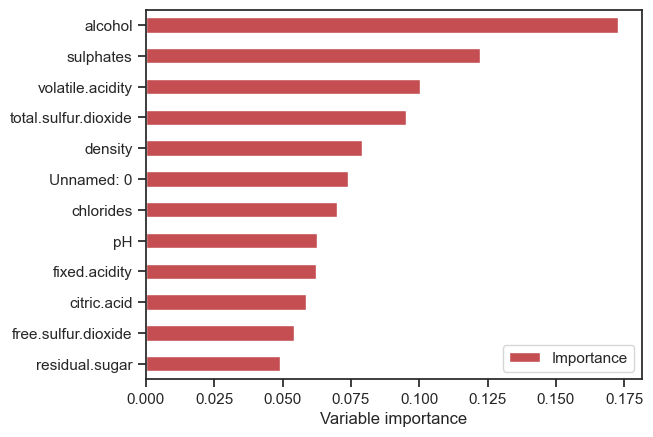

In [98]:
importance = pd.DataFrame({'Importance': rf_classifier.feature_importances_}, index=X.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable importance')
plt.legend(loc='lower right')
plt.legend()
plt.show()

In [31]:
confusion_matrix(y_test, rf_y_pred_test)

tp_rf = confusion_matrix(y_test, rf_y_pred_test)[0,0]
fp_rf = confusion_matrix(y_test, rf_y_pred_test)[0,1]
tn_rf = confusion_matrix(y_test, rf_y_pred_test)[1,1]
fn_rf = confusion_matrix(y_test, rf_y_pred_test)[1,0]

In [32]:
#------------
###-----------Comparsion between the different models of Accuracy and Cross Validation.

models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, knn_accuracy_train, knn_accuracy_test, knn_cv.mean()),
          ('SVM', tp_svm_linear, fp_svm_linear, tn_svm_linear, fn_svm_linear, svm_linear_accuracy_train, svm_linear_accuracy_test, svm_linear_cv.mean()),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, dt_accuracy_train, dt_accuracy_test, dt_cv.mean()),
          ('Random Forest Tree Classification', tp_rf, fp_rf, tn_rf, fn_rf, rf_accuracy_train, rf_accuracy_test, rf_cv.mean())
         ]

predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative','False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,Logistic Regression,110,34,128,48,0.745113,0.743750,0.739641
1,K-Nearest Neighbors (KNN),113,31,140,36,1.000000,0.790625,0.790434
2,SVM,112,32,126,50,0.747459,0.743750,0.738066
3,Decision Tree Classification,101,43,132,44,0.760751,0.728125,0.713054
4,Random Forest Tree Classification,121,23,139,37,1.000000,0.812500,0.803746


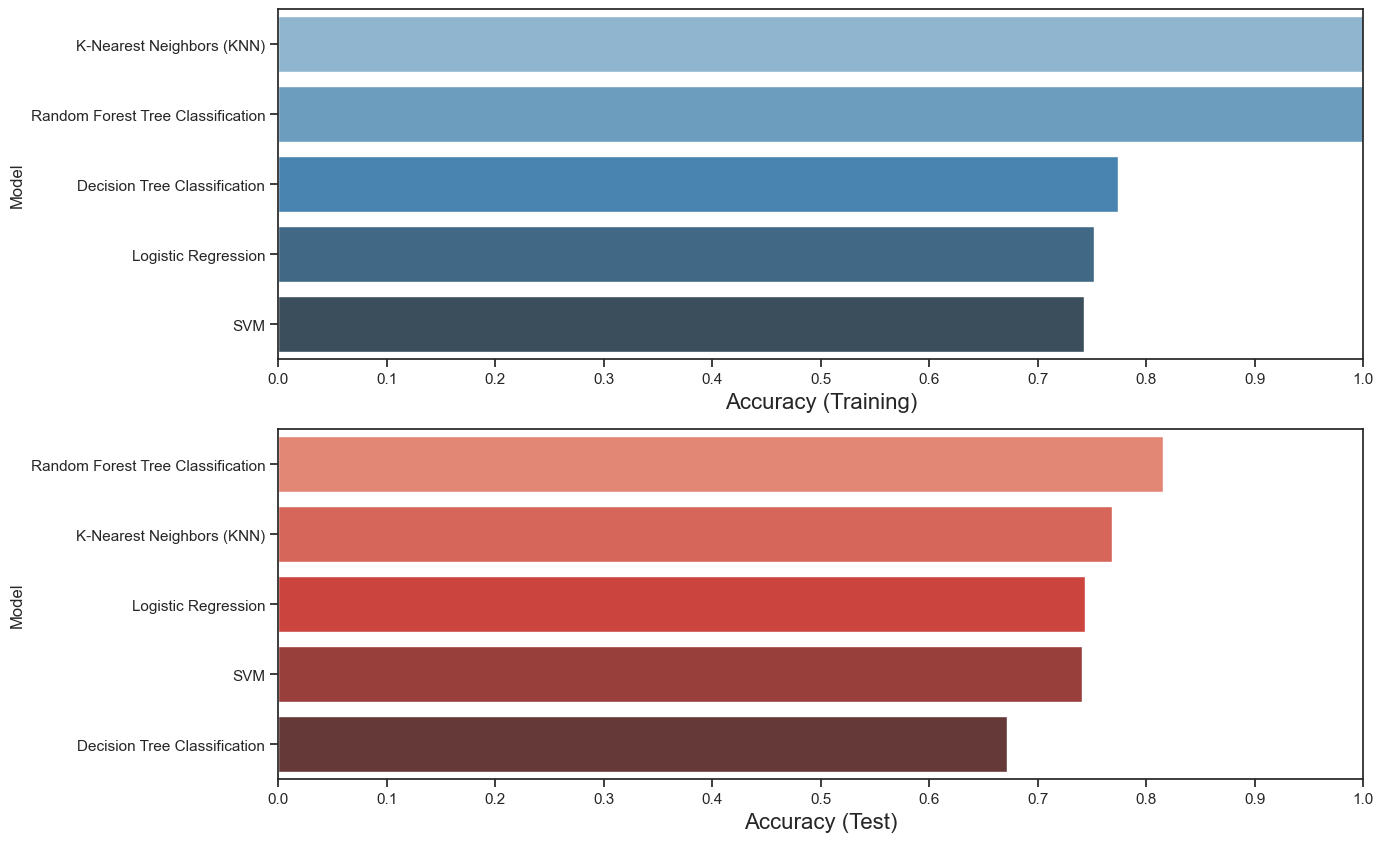

In [101]:
f, axes = plt.subplots(2,1, figsize=(14,10))
predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)
sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)
sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()